In [5]:
import time
import lda
execfile('load_data.py')
execfile('nlp_code/corpus.py')
execfile('nlp_code/document.py')

In [2]:
print data.shape
documents[0]

(823, 30)


u"Of all the deprivations of being homeless, the worst was believing I had nothing to give.\\n\\nA few years ago I found myself homeless. There was no good excuse for it. I had an excellent upbringing, I have a college degree, I had had a career in public relations, but then several things happened at once - I quit working, my mother died, I let my clinical depression go unchecked and untreated and simply lost all my savings, then my home, then my belongings. The only thing I had left was my pride, which isolated me from my friends and family and prevented me from getting the help I needed.\\n\\nOddly enough, it wasn't the possessions or the stability I missed most - it was the fact that I didn't feel like I was contributing. I wasn't using my talents, and I wasn't donating to things which had always been important to me. I wasn't even volunteering.\\n\\nI finally got help, entered a shelter run by Inter-Faith Ministries, started taking an anti-depressant, reached out to people and beg

In [3]:
t0 = time.time()
corpus = Corpus(documents, 'nlp_code/stopwords.txt', 2)
t1 = time.time()

corpus.generate_document_term_matrix()
corpus.generate_idfv()
corpus.generate_tf_idf()
termlist = list(corpus.token_set)
print 'Sanity checks:'
print '\tTime to build corpus: ' + str(t1 - t0)
print '\tTerms in first document: ' + str(corpus.docs[0].tokens)
print '\tTotal words in corpus: ' + str(corpus.ntotal_tokens)
print '\tNumber docs in corpus: ' + str(corpus.N)
print '\tNumber of unique words in corpus: ' + str(len(corpus.token_set))

counting terms for doc: 0
counting terms for doc: 25
counting terms for doc: 50
counting terms for doc: 75
counting terms for doc: 100
counting terms for doc: 125
counting terms for doc: 150
counting terms for doc: 175
counting terms for doc: 200
counting terms for doc: 225
counting terms for doc: 250
counting terms for doc: 275
counting terms for doc: 300
counting terms for doc: 325
counting terms for doc: 350
counting terms for doc: 375
counting terms for doc: 400
counting terms for doc: 425
counting terms for doc: 450
counting terms for doc: 475
counting terms for doc: 500
counting terms for doc: 525
counting terms for doc: 550
counting terms for doc: 575
counting terms for doc: 600
counting terms for doc: 625
counting terms for doc: 650
counting terms for doc: 675
counting terms for doc: 700
counting terms for doc: 725
counting terms for doc: 750
counting terms for doc: 775
counting terms for doc: 800
counting terms for doc: 0
counting terms for doc: 25
counting terms for doc: 50
c

In [7]:
tf_idf_matrix = np.array(corpus.tf_idf, dtype = 'int')

model = lda.LDA(n_topics=10, n_iter=1000, random_state=1)
time0 = time.time()
model.fit(tf_idf_matrix)
time1 = time.time()

print 'Time spent running LDA: {0}'.format(time1-time0)

In [13]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
vocab = np.array(list(corpus.token_set))
print len(topic_word[0])
for i, topic_dist in enumerate(topic_word):
    top_word_idcs = list(np.argsort(topic_dist))
    top_word_idcs.reverse()
    topic_words = vocab[top_word_idcs[0:n_top_words]]
    topic_words = [word.encode('UTF-8') for word in topic_words]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

10828
Topic 0: nicu pacer autism babi neonat born womb kulturec
Topic 1: cancer diseas diagnos treatment brain research cure diagnosi
Topic 2: student school youth skill teacher dream class program
Topic 3: dog adopt rescu cat anim pet foster shelter
Topic 4: disabl abus lighthous inc stabl heâ sexual traffick
Topic 5: camp camper adapt ski vermont hors cmt write
Topic 6: wildlif anim virginia forest flight refug bird fli
Topic 7: hi play women everyth room team don return
Topic 8: danc music perform art film artist theater dancer
Topic 9: villag haiti nepal contribut earthquak women india partner


In [65]:
likelihoods = []
iters = 500
n_topics_range = range(5,50,5)

for nt in n_topics_range:
    model = lda.LDA(n_topics=nt, n_iter=iters, random_state=1)
    model.fit(tf_idf_matrix)
    likelihoods.append(model.loglikelihood())

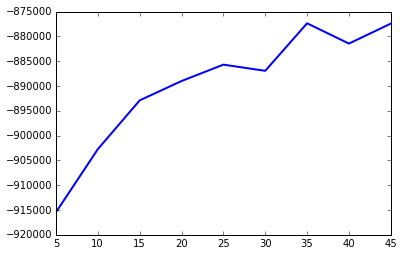

In [66]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline
line, = plt.plot(n_topics_range, likelihoods, linewidth=2)

plt.show()

In [20]:
likelihoods = []
n_iters_range = [i*10**exp for exp in range(2, 4) for i in range(1, 4)]
# [100, 200, 300, 1000, 2000, 3000]
n_topics = 20

for ni in n_iters_range:
    model = lda.LDA(n_topics=n_topics, n_iter=ni, random_state=1)
    model.fit(tf_idf_matrix)
    likelihoods.append(model.loglikelihood())

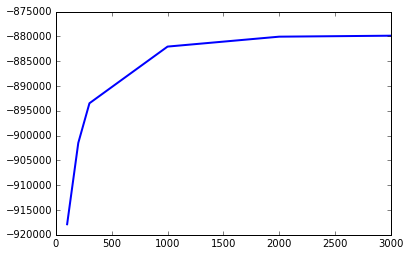

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline
line, = plt.plot(n_iters_range, likelihoods, linewidth=2)

plt.show()

In [167]:
n_topics, n_iters = [20,1000]
model = lda.LDA(n_topics=n_topics, n_iter=n_iters, random_state=2)
model.fit(tf_idf_matrix)

<lda.lda.LDA instance at 0x11f5e7cb0>

In [188]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
vocab = np.array(list(corpus.token_set))
topic_top_words_dict = {}
for i, topic_dist in enumerate(topic_word):
    top_word_idcs = list(np.argsort(topic_dist))
    top_word_idcs.reverse()
    topic_words = vocab[top_word_idcs[0:n_top_words]]
    topic_words = [word.encode('UTF-8') for word in topic_words]
    topic_top_words_dict[i] = topic_words
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: museum jewish sweat ach legal nimagin nyc cathol
Topic 1: nicu neonat birth womb babi flight fli prematur
Topic 2: villag haiti earthquak nepal trip water africa solar
Topic 3: danc art perform chicago ski artist vermont adapt
Topic 4: anim dog cat rescu adopt wildlif pet foster
Topic 5: mental seizur behavior autism prevent suicid weight disord
Topic 6: student school power girl youth connect contribut teacher
Topic 7: order book english certif send languag paul transcend
Topic 8: camp diseas psp cure hors camper research cmt
Topic 9: hi play bless room didn return don eye
Topic 10: disabl justic addict women traffick abus violenc biani
Topic 11: pregnanc forest loss babi sweet georgia preschool reassur
Topic 12: aneurysm veteran militari brain ruptur retreat hotel scan
Topic 13: net malaria church garden selah intern librari methodist
Topic 14: pacer run marathon pasadena runner mile ran race
Topic 15: cancer transplant battl hospic chemo treatment leukemia cousin
Topic 16: 

In [189]:
doc_topic = model.doc_topic_
n_cols = data.shape[1]
doc_topic_cols = range(n_cols, n_cols+n_topics)
data_plus = np.concatenate((data, doc_topic), axis=1)
story_idx = 10
obs_story = data_plus.item((story_idx,story_text_column_idx))
print obs_story
print np.argmax(data_plus[story_idx,:][doc_topic_cols])
print data_plus[story_idx,:][doc_topic_cols]

Giving the gift of a smile.\nDoesn't get any better than that. We live basically paycheck to almost paycheck and things have always been tight. But a little over 2 years ago my 2 year old was officially diagnosed autistic. And honestly I'd barely heard of it. I cried for days, I sank into a pitty of tears and why me, why my daughter. I felt scared as if I had failed her. Then I googled, I searched, I looked high and low. I found many sites the first one not so helpful, I won't name any names but I'll say they offered me a packet to do a fundraiser and walk for them. However they were unable to help me with any other help as my daughter wasn't in their criteria as considered she was a girl and not a boy and I guess they is more of a boy issue ( funny I've got three girls on various end of the spectrum and not a boy one ) . Then I found Kulturecity and was instantly welcomed, I got various opinions from their 'groupies' on their page . My girls were sent a toy and man the smile on their 

/Users/aimeebarciauskas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [190]:
# key column, story_text_column, doc_topic columns
doc_topic_cols = range(n_cols, n_cols+n_topics)
doc_topic_cols.insert(0,0)
print doc_topic_cols
data_trunc =  data_plus[:,doc_topic_cols]
data_trunc[:,0] = map(int, data_trunc[:,0])

fmts = ['%3i']
fmts.extend(['%10.5f']*n_topics)
np.savetxt('data_plus.csv', data_trunc, delimiter=',', fmt=fmts)

[0, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [191]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept = False, normalize= True)
votes_col_idx = np.argwhere(columns == 'votes_total')[0]
print votes_col_idx
# Train the model using the training sets
y = [data.item(i,votes_col_idx) for i in range(data.shape[0])]
cols = range(n_cols, n_cols+n_topics)
print cols
X = data_plus[:,cols]
print y[0:10]
print X[0,:]

regr.fit(X, y)

[4]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.0, 13.0, 0.0, 1.0, 66.0, 22.0, 5.0, 2657.0, 16.0, 16.0]
[0.10473933649289102 0.0004739336492890996 0.005213270142180096
 0.028909952606635075 0.0004739336492890996 0.08578199052132703
 0.19478672985781995 0.009952606635071092 0.0004739336492890996
 0.5123222748815166 0.0004739336492890996 0.0004739336492890996
 0.0004739336492890996 0.005213270142180096 0.0004739336492890996
 0.0004739336492890996 0.0004739336492890996 0.0004739336492890996
 0.047867298578199054 0.0004739336492890996]


/Users/aimeebarciauskas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [192]:
regr.coef_

array([   7.32723325, -123.877785  ,   -4.11172889,  -68.01909993,
         98.17188137,  -81.43007607,  189.68948329,  228.07446861,
         34.95795512,  229.19184519, -138.53279745,   41.28334167,
          4.50233754,  -50.51792315, -164.38405739,  -82.55695172,
        -41.41263473,  133.19376593, -132.95772758,  102.99282022])

In [193]:
topics_cov = np.cov(X.T)
for t1 in range(topics_cov.shape[0]):
    for t2 in range(t1+1,topics_cov.shape[1]):
        cov_t1t2 = topics_cov.item((t1,t2))
        if cov_t1t2 > 0:
            print 'Topic {} positively varies with topic {}, cov: {}'.format(t1,t2,cov_t1t2)

Topic 0 positively varies with topic 6, cov: 0.000768118438246
Topic 2 positively varies with topic 6, cov: 0.000157764825907
Topic 3 positively varies with topic 6, cov: 0.000844860412836
Topic 6 positively varies with topic 16, cov: 0.000541401785186
Topic 6 positively varies with topic 17, cov: 0.00013565441036
Topic 9 positively varies with topic 11, cov: 0.000488203679994
Topic 9 positively varies with topic 14, cov: 0.000881487542726
Topic 9 positively varies with topic 15, cov: 0.000181204713944
Topic 9 positively varies with topic 18, cov: 0.000235078419939


In [194]:
top_topic_documents = []

for i in range(n_topics):
    top_doc_idx = np.argmax(doc_topic[:,i])
    top_doc_percentage = np.max(doc_topic[:,i])
    document = documents[top_doc_idx]
    print "Top document for topic {} has probability {} and text:".format(i, top_doc_percentage)
    print "Top terms: {}".format(topic_top_words_dict[i])
    print document
    print "\n\n"

Top document for topic 0 has probability 0.985714285714 and text:
Top terms: ['museum', 'jewish', 'sweat', 'ach', 'legal', 'nimagin', 'nyc', 'cathol']
Je suis le represantant legal d'une association locale oeuvrants dans la province du Sud kivu AAEV en sigle, Association d'Aide aux Enfants Vilnerables de Sange fans la plaine dela Ruzizi. \nJ'ai volontairement aide les dans incendies d'un camion citerne Ã Sange, qui a brulÃ© plus des 447 personnes et moi j'avais aidÃ© Ã faire evacuer plus 126 personnes jusqu'Ã l'hopital dont quelques un sont morts et 83 personnes ont trouve la vie.\nC est vraiment un honneur pour moi quand je rencontre l'un des ces personnes qui me connaissent, je suis tres ravi.\n\nEn Darsalaam pour le moment Ã la recherche de financement..



Top document for topic 1 has probability 0.809943181818 and text:
Top terms: ['nicu', 'neonat', 'birth', 'womb', 'babi', 'flight', 'fli', 'prematur']
A NICU SURIVORS STORY & THE POWER OF ME TO WE \n\nBorn at The University of Was

In [195]:
prob_sums = np.sum(doc_topic, axis = 0)
top_topics_idcs = list(np.argsort(prob_sums))
top_topics_idcs.reverse()
for i in range(n_topics):
    print 'Topic {}'.format(top_topics_idcs[i])
    print prob_sums[top_topics_idcs[i]]    
    print topic_top_words_dict[top_topics_idcs[i]]
    print ''

Topic 9
240.868675614
['hi', 'play', 'bless', 'room', 'didn', 'return', 'don', 'eye']

Topic 6
149.535958541
['student', 'school', 'power', 'girl', 'youth', 'connect', 'contribut', 'teacher']

Topic 4
37.4845332282
['anim', 'dog', 'cat', 'rescu', 'adopt', 'wildlif', 'pet', 'foster']

Topic 2
30.8510212427
['villag', 'haiti', 'earthquak', 'nepal', 'trip', 'water', 'africa', 'solar']

Topic 8
29.4530686596
['camp', 'diseas', 'psp', 'cure', 'hors', 'camper', 'research', 'cmt']

Topic 17
27.600933042
['hondura', 'michael', 'togo', 'salvat', 'refuge', 'theatr', 'dipg', 'ordinari']

Topic 3
27.6000228322
['danc', 'art', 'perform', 'chicago', 'ski', 'artist', 'vermont', 'adapt']

Topic 10
27.2201515421
['disabl', 'justic', 'addict', 'women', 'traffick', 'abus', 'violenc', 'biani']

Topic 19
26.4003456886
['cancer', 'diagnos', 'tumor', 'diagnosi', 'patient', 'brain', 'research', 'lighthous']

Topic 5
24.4775755958
['mental', 'seizur', 'behavior', 'autism', 'prevent', 'suicid', 'weight', 'disor

In [198]:
from collections import Counter
Counter(np.argmax(doc_topic, axis = 1))

Counter({9: 261, 6: 119, 4: 51, 3: 34, 8: 33, 2: 32, 17: 31, 19: 30, 10: 27, 13: 26, 5: 23, 16: 23, 0: 20, 15: 20, 7: 19, 12: 19, 11: 16, 1: 14, 14: 14, 18: 11})

In [183]:
from sklearn.cross_validation import train_test_split

votes_col_idx = np.argwhere(columns == 'votes_total')[0]
# Train the model using the training sets
y = np.array([data.item(i,votes_col_idx) for i in range(data.shape[0])])

cols = range(n_cols, n_cols+n_topics)
X = data_plus[:,cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression(fit_intercept = False, normalize= True)
regr.fit(X_train, y_train)

/Users/aimeebarciauskas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [186]:
# Model is worse than guessing using the average?
regr.score(X_test, y_test)

-0.076552896143808447